In [1]:
library(tidyverse)
library(cowplot)
library(ggpubr)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘ggpubr’


The following object is masked from ‘pa

In [2]:
comparison_df <- fs::dir_ls("data/gwas") |>
    fs::dir_ls() |>
    keep(~str_detect(., "comparison.tsv")) |>
    vroom::vroom(id = "gwas_method", show_col_types = F) |>
    mutate(
        gwas_method = gwas_method |>
            str_remove("^data/gwas/") |>
            str_remove("/comparison.tsv$")
    )

In [3]:
plot_df <- comparison_df |>
    filter(sumstat == "chisq") |>
    mutate(
        gwas_method = gwas_method |>
            recode_factor(
                ols_univariate = "OLS univariate",
                ols_multivariate = "OLS multivariate",
                regenie = "Regenie",
                fastgwa = "FastGWA",
                saige = "SAIGE",
            )
    )

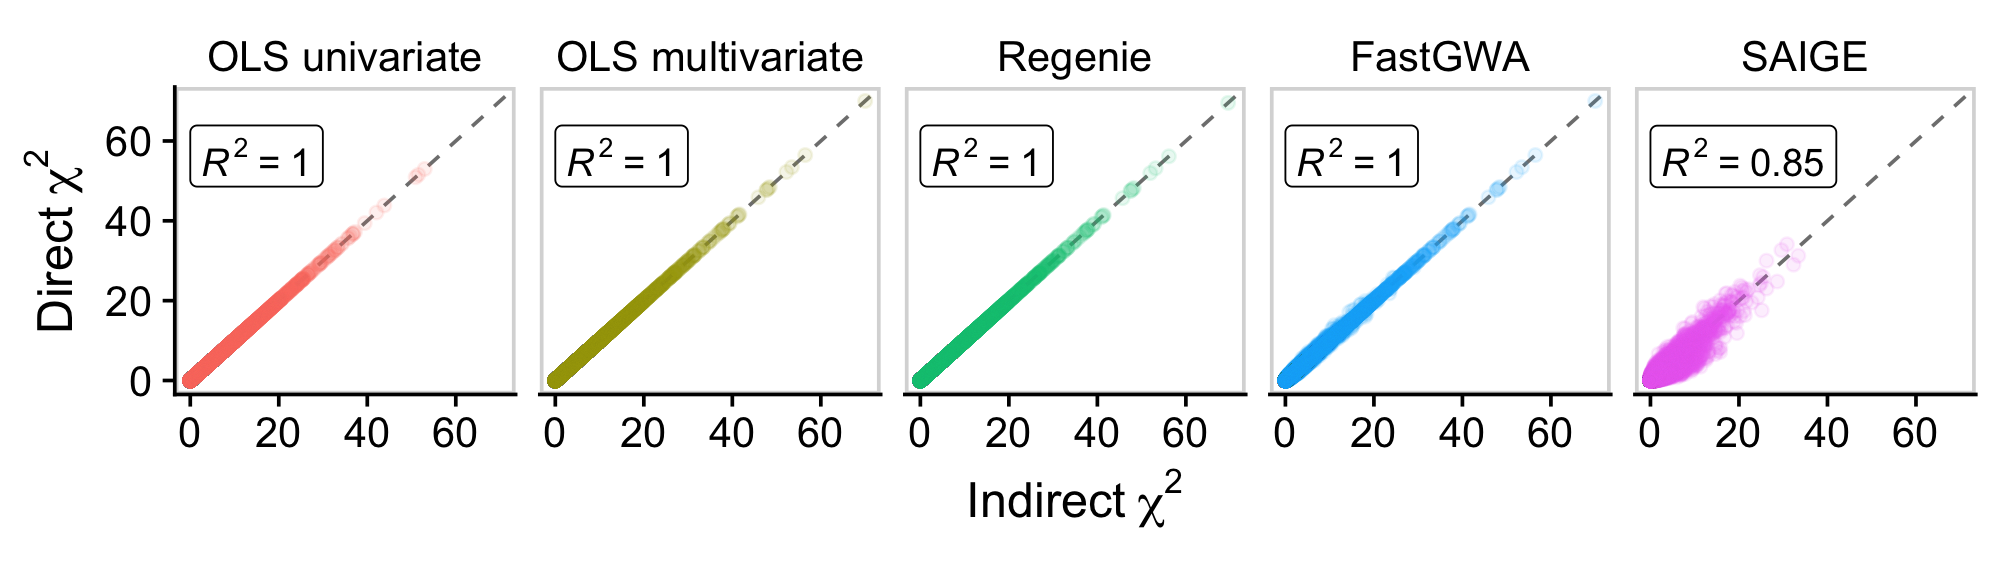

In [4]:
options(repr.plot.width = 8, repr.plot.height = 2.25, repr.plot.res = 250)

plot <- plot_df |>
    ggplot(aes(x = indirect, y = direct, color = gwas_method)) +
    geom_abline(slope = 1, intercept = 0, color = "gray50", linetype = "dashed") +
    geom_point(alpha = 0.1) +
    facet_wrap(vars(gwas_method), nrow = 1) +
    theme_cowplot() +
    theme(
        strip.background = element_rect(fill = "white"),
        legend.position = "none",
    ) +
    panel_border() +
    xlab(expression("Indirect"~chi^2)) +
    ylab(expression("Direct"~chi^2)) +
    stat_cor(
        aes(x = indirect, y = direct, label = after_stat(rr.label)), 
        geom = "label", label.x.npc = "left", label.y.npc = "top",
        inherit.aes = FALSE
    )

plot

In [5]:
save_plot("img/indirect-gwas-validation.png", plot, base_height = 2.25, base_width = 8, dpi = 400)